 #                     1.INtrduction
The Wavelet Analysis has been established and used already for a long time, and managed to prove itself as an effective means for a solution of different tasks in adaptive time series data analysis. Wavelet transform is very similar in character to Fourier transform therefore the technique of its use reminds the spectrum methods. The main difference of these two conversions is that Fourier transform uses as basis harmonic functions of fixed frequency, and the wavelet transform – the whole class of different basic functions of different scale and localization on time (wavelets). This laboratory task provides the basics about discrete wavelet transform and its usage in decomposing time series into meaningful components. 

# 2. Laboratory Task 
The final result of laboratory task is presented as the report in form of Jupyternotebook (or something similar), with all the needed commands for a complete Run of cells. Now, let’s begin with time series data analysis: 

1) Import into your code the following libraries: 

In [1]:
import numpy as np 
import numpy.random as rand 
import matplotlib.pyplot as plt 
import h5py 
import pywt 
%matplotlib inline 

2)Create the model time series with 2 periods and noise: 

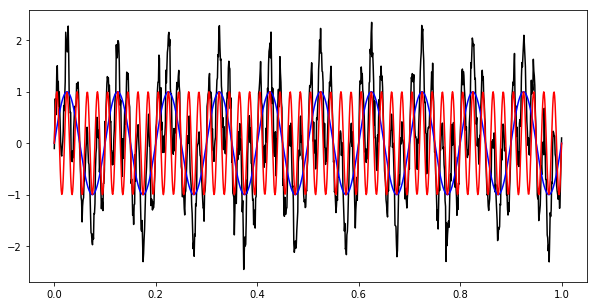

In [2]:
t = np.linspace(0, 1, 1024) 
f1 = 10 
f2 = 50 
F=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t)) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, np.sin(2*np.pi*f1*t), 'b') 
plt.plot(t, np.sin(2*np.pi*f2*t), 'r') 
plt.show() 

3) The work with wavelets in Python in most cases is done with PyWavelets library. The wavelet analysis is a powerful and versatile instrument, but requires a careful choice of parameters and basis function. First of all, the main parameter is the basis (“mother”) wavelet. There are different families of wavelets, most of them are presented here: http://wavelets.pybytes.com. Carefully familiarize yourself with different wavelets, especially their visual forms and levels/numbers, because in most cases the final decomposed data would be quite similar in its form to the basis visual form of wavelet. But let’s start with one of the most useful ones – Meyer wavelet: 

In [3]:
wvlt = pywt.Wavelet('dmey') 

4) Second, the decomposition can be achieved up to different level. Higher level means higher number of components and higher order of decomposition. For discrete data the highest available level is limited based on time series length, for example, in our case max level is 4: 

In [4]:
pywt.dwt_max_level(len(F), wvlt) # output is 4 

4

5) Third, on the edges of time interval we lack data points for wavelet analysis, thus, wavelets can extend our data through different means/modes (mode): simple padding with zeroes, constant extrapolation, symmetric and asymmetric, periodic and periodization, and so on. Based on the initial data and the required components different mode can provide better or worse results. 

6) Fourth, decomposition for discrete wavelet analysis is represented as combination of Approximation (cA) and Detail (cD) coefficients. There is always at least one approximation and several details. Number of details is always equal chosen level of decomposition. By changing basis wavelet, level, mode and combination of grouped approximations and details different components would be achieved through wavelet decomposition. 

7) Let’s decompose our data with Meyer wavelet up to level 4: 

In [5]:
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=4) 


8) Note the output results – exactly one Approximation cA4 and 4 Details from level 4 cD4 down to level 1 cD1. If we select level 3 of decomposition (level=3), then the output should be written in form: cA3, cD3, cD2, cD1. It is possible to simply use one output of function, but it still should be decomposed into arrays of approximation and details. Also note, that these approximation and details are just wavelet coefficients and not exactly the time series data.

9) To reconstruct and group our components we use this form of code: 

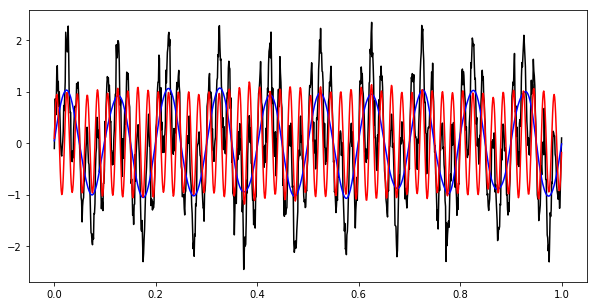

In [6]:
Fre = pywt.waverec((cA4, None, None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.plot(t, Fre2, 'r') # this is the second period component 
plt.show()

10) Note the keywords None. In wavelet reconstruction those coefficients, that are not required for grouping, are denoted as None. It means that in first component we only use coefficient for approximation cA4, in second component we only use coefficient for the 4th detail cD4. By combining different approximation and details coefficients we would achieve different decomposition of initial time series, although, the overall form of combining coefficients is restricted

11) On your own, make the similar decomposition and reconstruction for the level 3 of wavelet decomposition (level = 3). Compare the results. 

In [7]:
cA3, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=3)

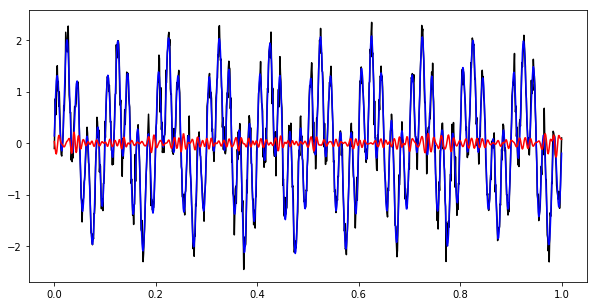

In [8]:
Fre = pywt.waverec((cA3, None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((None, cD3, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.plot(t, Fre2, 'r') # this is the second period component 
plt.show()

12) Now repeat all of those initial steps for model data decomposition for your own student ID variant. Names of wavelets are presented in table below. The level of decomposition, the grouping of coefficients and every other parameter should be chosen on your own – for a better result of decomposition for two periodic components. 

In [9]:
wvlt = pywt.Wavelet('coif3') 

In [10]:
pywt.dwt_max_level(len(F), wvlt) 

5

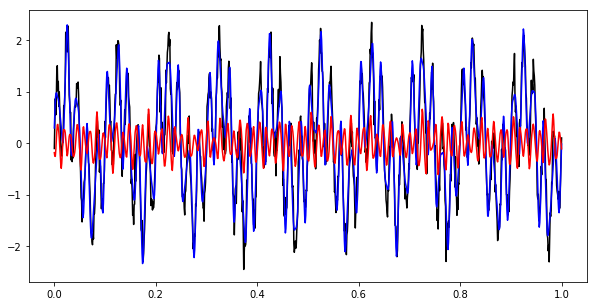

In [11]:
cA3,cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=3)
Fre = pywt.waverec((cA3,None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((None, cD3, None,None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.plot(t, Fre2, 'r') # this is the second period component 
plt.show()

In [12]:
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=4) 

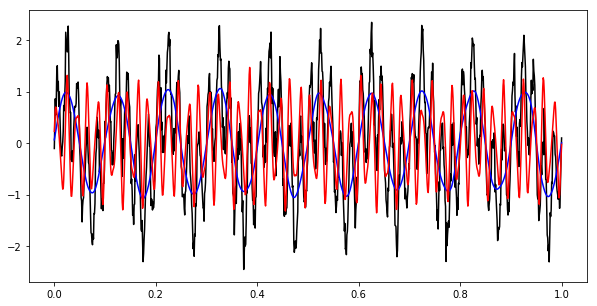

In [13]:
Fre = pywt.waverec((cA4, None, None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.plot(t, Fre2, 'r') # this is the second period component 
plt.show()

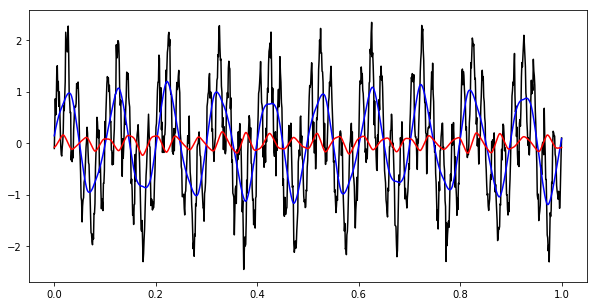

In [14]:
cA5,cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=5)
Fre = pywt.waverec((cA5,None, None, None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((None, cD5,None,None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.plot(t, Fre2, 'r') # this is the second period component 
plt.show()

13) There are several modifications of wavelet decomposition. For example, there is a Stationary Wavelet Transform (SWT). This method provides a larger pool of approximation and detail coefficients with higher level of decomposition. To use it type in Python: 

In [15]:
wvlt = pywt.Wavelet('dmey') 
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(F, wvlt, level=5) 

14) Note the output result – we have pairs of approximation and detail coefficients. Moreover, in grouping we can use them and combine however we want, providing a vastly larger pool of combinations. Let’s try to recreate our initial periodic components from model data with SWT. Also, note the normalization of data due to removing additional pairs. 

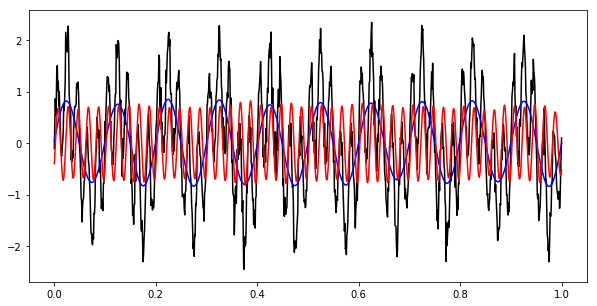

In [16]:
rr1 = pywt.iswt([(cA5, cD5)], wvlt) # inverse transform for one pair 
rr2 = pywt.iswt([(cD4, cD3)], wvlt) # inverse transform for one pair 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, rr1/5, 'b') # normalize by level 5 (one pair) 
plt.plot(t, rr2/4, 'r') # normalize be level 4 (one pair) 
plt.show()

15) Now repeat the SWT decomposition of this data, but specifically for your student ID variant. Choose all of the parameters on your own. 

In [17]:
wvlt = pywt.Wavelet('coif3') 
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(F, wvlt, level=5) 

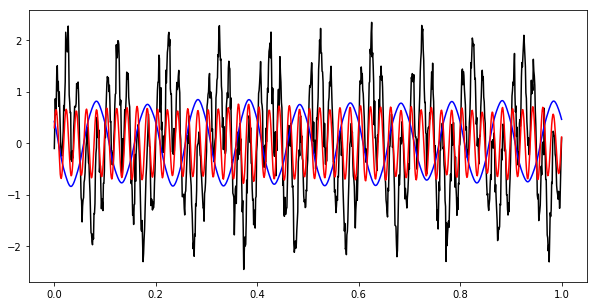

In [18]:
rr1 = pywt.iswt([(cA5, cD5)], wvlt) # inverse transform for one pair 
rr2 = pywt.iswt([(cD4, cD3)], wvlt) # inverse transform for one pair 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, rr1/5, 'b') # normalize by level 5 (one pair) 
plt.plot(t, rr2/4, 'r') # normalize be level 4 (one pair) 
plt.show()

16) Next is the most complex type of wavelet decomposition, but with the highest number of output alterations. It is called Wavelet Packet Decomposition = WPD. This method is based on discrete wavelet transform, but provides a full tree of approximation and detail coefficients for the chosen level. For example, on level 4 of decomposition there are 16 combinations of approximations and details: 'aaaa', 'aaad', 'aada', 'aadd', 'adaa', 
'adad', 'adda', 'addd', 'daaa', 'daad', 'dada', 'dadd', 'ddaa', 'ddad', 'ddda', 'dddd' 

Compare this against DWT before, where for level 4 we have only one combination 'addd' (approximation + 3 details). 

17) In WPD the decomposition is represented as binary tree (binary between ‘a’ and ‘d’), and by selecting or removing the nodes of this tree the different decomposition will prevail. The WPD procedure is started with creation of full binary tree of decomposition: 

In [19]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization') 
print([node.path for node in wp.get_level(4, 'freq')]) # output all of the binary tree nodes, ordered by their frequency width 

['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


18) Let’s try to delete one node and see what happens: 

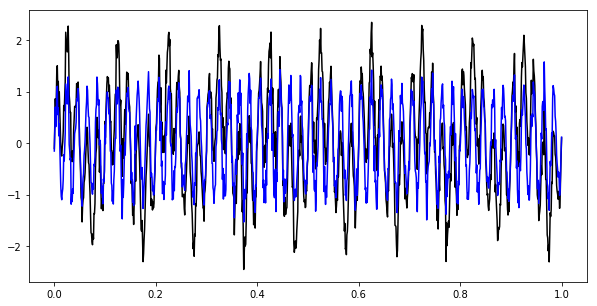

In [20]:
del wp['aaaa'] # deleting the most inner node 
reF = wp.reconstruct() # and reconstruct the data … 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, reF, 'b') # this is something periodic, but with a lot of noise 
plt.show() 

19) If simple deletion of nodes does not yield the result, then maybe selecting few of them and grouping can provide a better result: 

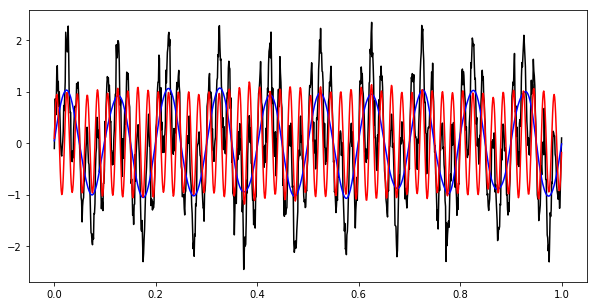

In [21]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization') 
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization') 
new_wp['aaaa'] = wp['aaaa'].data  # select the first node  
new_wp.reconstruct(update=True)  # update the data inside 
reF1 = new_wp.data    # reconstruct it 
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization') 
new_wp['aaad'] = wp['aaad'].data  # select the second node  
new_wp.reconstruct(update=True)  # update the data inside 
reF2 = new_wp.data    # reconstruct another one 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, reF1, 'b')  # component 1 
plt.plot(t, reF2, 'r')   # component 2 
plt.show()

20) Try to achieve similar results for your student ID variant with different basis wavelet and combinations of nodes. Level of decomposition can also change. 

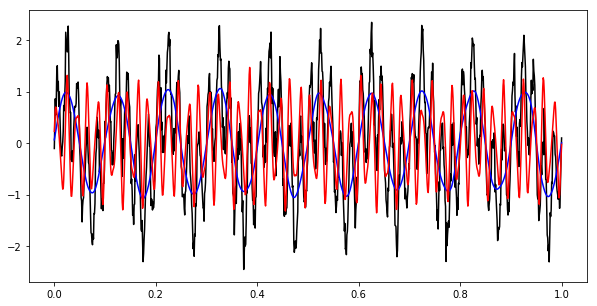

In [22]:
wp = pywt.WaveletPacket(data=F, wavelet='coif3', mode='periodization') 
new_wp = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaaa'] = wp['aaaa'].data  # select the first node  
new_wp.reconstruct(update=True)  # update the data inside 
reF1 = new_wp.data    # reconstruct it 

new_wp = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaad'] = wp['aaad'].data  # select the second node  
new_wp.reconstruct(update=True)  # update the data inside 
reF2 = new_wp.data    # reconstruct another one 

plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, reF1, 'b')  # component 1 
plt.plot(t, reF2, 'r')   # component 2 
plt.show()

21) Now let’s try to decompose some data with wavelet technique, based on wavelet basis according to your student ID variant, for different time series data

22) First, decompose the frequency break time series into 2 periodic components on different time-spans:

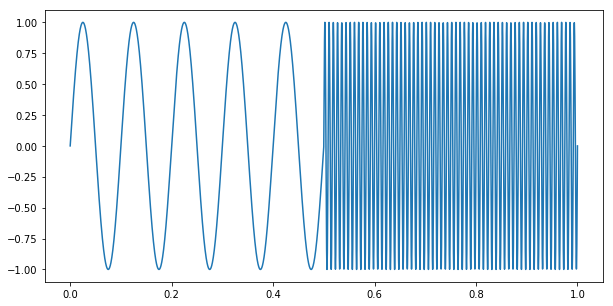

In [23]:
t = np.linspace(0, 1, 4096) 
xf = np.zeros(4096) 
for i in range(0, len(t)//2): 
    xf[i] = np.sin(2*np.pi*10*t[i])     
for i in range(len(t)//2, len(t)): 
    xf[i] = np.sin(2*np.pi*120*t[i]) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, xf) 
plt.show() 

In [24]:
wvlt = pywt.Wavelet('coif3') 
pywt.dwt_max_level(len(xf), wvlt) 

7

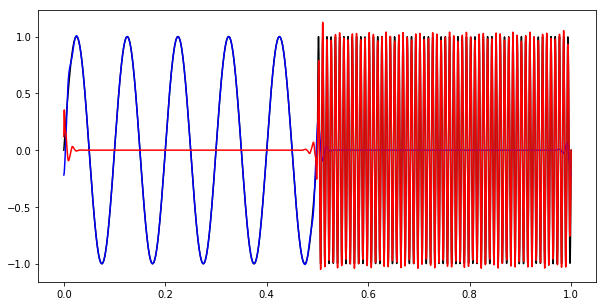

In [25]:
cA5,cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(xf, wvlt, mode='periodization', level=5) 
Fre = pywt.waverec((cA5,None, None, None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((None, cD5, cD4,None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, xf, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.plot(t, Fre2, 'r') # this is the second period component 
plt.show() 

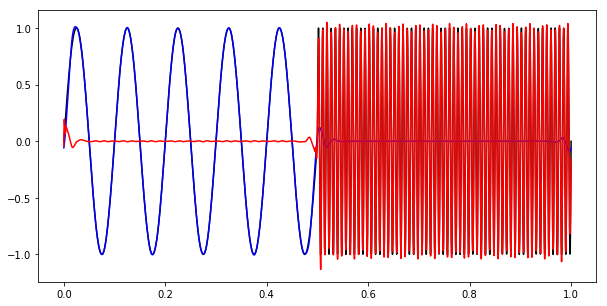

In [26]:
cA6,cD6,cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(xf, wvlt, mode='periodization', level=6) 
Fre = pywt.waverec((cA6,None,None, None, None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((None, cD6,cD5, cD4,None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, xf, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.plot(t, Fre2, 'r') # this is the second period component 
plt.show() 

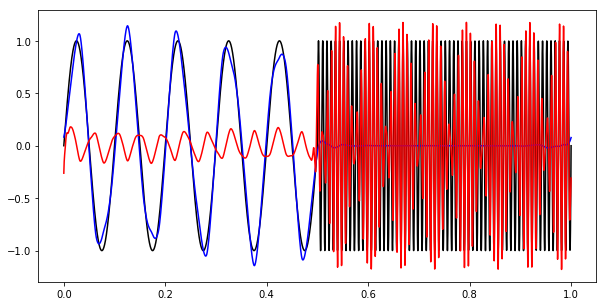

In [27]:
cA7,cD7,cD6,cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(xf, wvlt, mode='periodization', level=7) 
Fre = pywt.waverec((cA7,None,None,None, None, None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((None, cD7,cD6,cD5, None,None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, xf, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.plot(t, Fre2, 'r') # this is the second period component 
plt.show() 

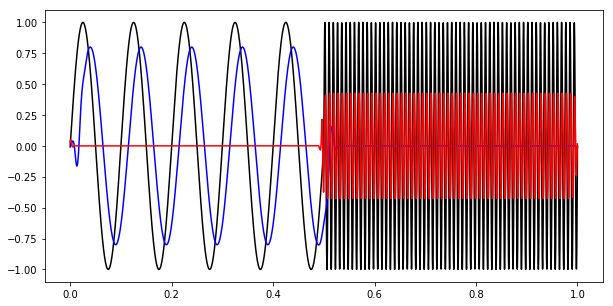

In [28]:
(cA7,cD7),(cA6,cD6),(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(xf, wvlt, level=7) 
rr1 = pywt.iswt([(cA5, cD5)], wvlt) # inverse transform for one pair 
rr2 = pywt.iswt([(cD4, cD4)], wvlt) # inverse transform for one pair 
plt.figure(figsize = (10, 5)) 
plt.plot(t, xf, 'k') 
plt.plot(t, rr1/5, 'b') # normalize by level 5 (one pair) 
plt.plot(t, rr2/4, 'r') # normalize be level 4 (one pair)
plt.show() 

['aaaaaaa', 'aaaaaad', 'aaaaadd', 'aaaaada', 'aaaadda', 'aaaaddd', 'aaaadad', 'aaaadaa', 'aaaddaa', 'aaaddad', 'aaadddd', 'aaaddda', 'aaadada', 'aaadadd', 'aaadaad', 'aaadaaa', 'aaddaaa', 'aaddaad', 'aaddadd', 'aaddada', 'aadddda', 'aaddddd', 'aadddad', 'aadddaa', 'aadadaa', 'aadadad', 'aadaddd', 'aadadda', 'aadaada', 'aadaadd', 'aadaaad', 'aadaaaa', 'addaaaa', 'addaaad', 'addaadd', 'addaada', 'addadda', 'addaddd', 'addadad', 'addadaa', 'addddaa', 'addddad', 'adddddd', 'addddda', 'adddada', 'adddadd', 'adddaad', 'adddaaa', 'adadaaa', 'adadaad', 'adadadd', 'adadada', 'adaddda', 'adadddd', 'adaddad', 'adaddaa', 'adaadaa', 'adaadad', 'adaaddd', 'adaadda', 'adaaada', 'adaaadd', 'adaaaad', 'adaaaaa', 'ddaaaaa', 'ddaaaad', 'ddaaadd', 'ddaaada', 'ddaadda', 'ddaaddd', 'ddaadad', 'ddaadaa', 'ddaddaa', 'ddaddad', 'ddadddd', 'ddaddda', 'ddadada', 'ddadadd', 'ddadaad', 'ddadaaa', 'ddddaaa', 'ddddaad', 'ddddadd', 'ddddada', 'dddddda', 'ddddddd', 'dddddad', 'dddddaa', 'dddadaa', 'dddadad', 'dddaddd'

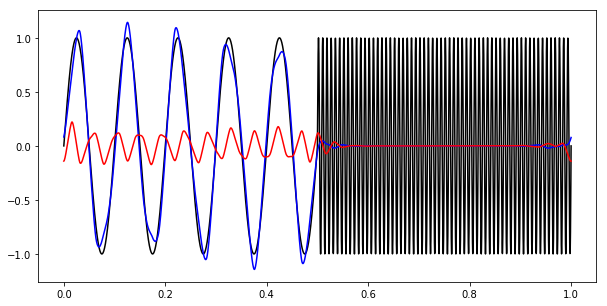

In [29]:
wp = pywt.WaveletPacket(data=xf, wavelet='coif3', mode='periodization') 
print([node.path for node in wp.get_level(7, 'freq')]) 

wp = pywt.WaveletPacket(data=xf, wavelet='coif3', mode='periodization') 
new_wp = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaaaaaa'] = wp['aaaaaaa'].data  # select the first node  
new_wp.reconstruct(update=True)  # update the data inside 
reF1 = new_wp.data    # reconstruct it 

new_wp = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaaaaad'] = wp['aaaaaad'].data  # select the second node  
new_wp.reconstruct(update=True)  # update the data inside 
reF2 = new_wp.data    # reconstruct another one 

plt.figure(figsize = (10, 5)) 
plt.plot(t, xf, 'k') 
plt.plot(t, reF1, 'b')  # component 1 
plt.plot(t, reF2, 'r')   # component 2 plt.show() 

23) Next, try to estimate the exponential trend in the following noisecontaminated data:

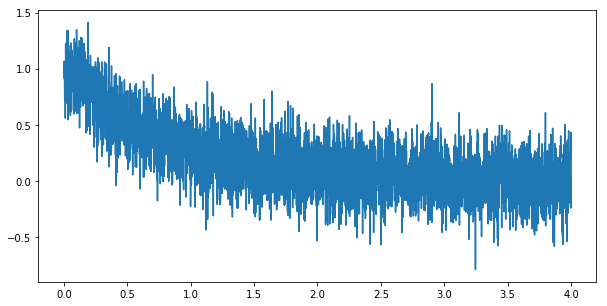

In [30]:
t = np.linspace(0, 4, 4096) 
Fexp = np.exp(-0.4*np.pi*t) + 0.2*rand.randn(len(t)) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Fexp) 
plt.show() 

In [31]:
wvlt = pywt.Wavelet('coif3') 
pywt.dwt_max_level(len(Fexp), wvlt) 

7

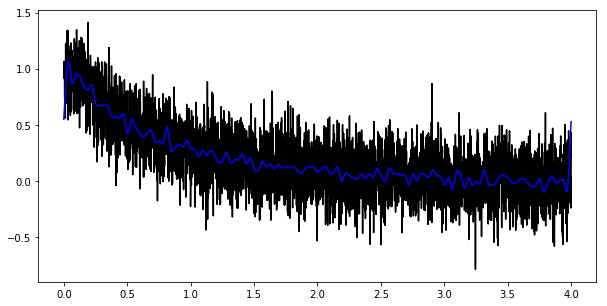

In [32]:
cA5,cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(Fexp, wvlt, mode='periodization', level=5) 
Fre = pywt.waverec((cA5,None, None, None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Fexp, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.show() 

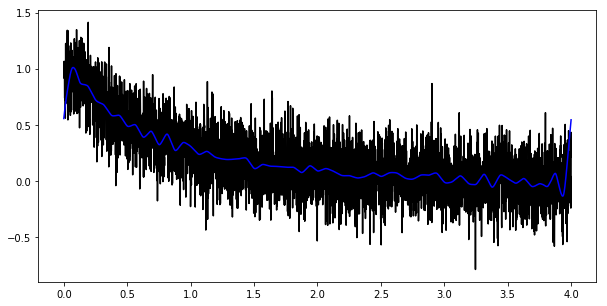

In [33]:
cA6,cD6,cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(Fexp, wvlt, mode='periodization', level=6) 
Fre = pywt.waverec((cA6,None,None, None, None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Fexp, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.show() 

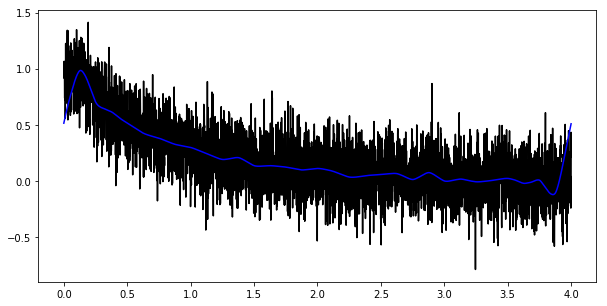

In [34]:
cA7,cD7,cD6,cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(Fexp, wvlt, mode='periodization', level=7) 
Fre = pywt.waverec((cA7,None,None,None, None, None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Fexp, 'k') 
plt.plot(t, Fre, 'b') # this is the first period component 
plt.show() 

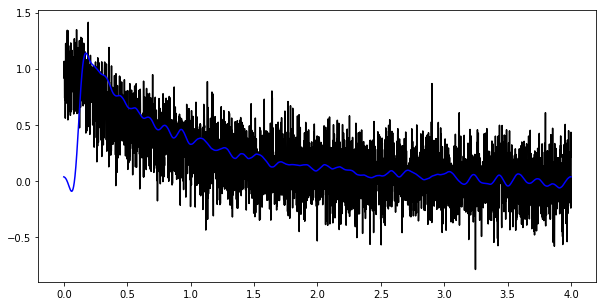

In [35]:
(cA7,cD7),(cA6,cD6),(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(Fexp, wvlt, level=7) 
rr1 = pywt.iswt([(cA6, cD6)], wvlt) # inverse transform for one pair 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Fexp, 'k') 
plt.plot(t, rr1/5, 'b') # normalize by level 5 (one pair) 
plt.show() 

['aaaaaaa', 'aaaaaad', 'aaaaadd', 'aaaaada', 'aaaadda', 'aaaaddd', 'aaaadad', 'aaaadaa', 'aaaddaa', 'aaaddad', 'aaadddd', 'aaaddda', 'aaadada', 'aaadadd', 'aaadaad', 'aaadaaa', 'aaddaaa', 'aaddaad', 'aaddadd', 'aaddada', 'aadddda', 'aaddddd', 'aadddad', 'aadddaa', 'aadadaa', 'aadadad', 'aadaddd', 'aadadda', 'aadaada', 'aadaadd', 'aadaaad', 'aadaaaa', 'addaaaa', 'addaaad', 'addaadd', 'addaada', 'addadda', 'addaddd', 'addadad', 'addadaa', 'addddaa', 'addddad', 'adddddd', 'addddda', 'adddada', 'adddadd', 'adddaad', 'adddaaa', 'adadaaa', 'adadaad', 'adadadd', 'adadada', 'adaddda', 'adadddd', 'adaddad', 'adaddaa', 'adaadaa', 'adaadad', 'adaaddd', 'adaadda', 'adaaada', 'adaaadd', 'adaaaad', 'adaaaaa', 'ddaaaaa', 'ddaaaad', 'ddaaadd', 'ddaaada', 'ddaadda', 'ddaaddd', 'ddaadad', 'ddaadaa', 'ddaddaa', 'ddaddad', 'ddadddd', 'ddaddda', 'ddadada', 'ddadadd', 'ddadaad', 'ddadaaa', 'ddddaaa', 'ddddaad', 'ddddadd', 'ddddada', 'dddddda', 'ddddddd', 'dddddad', 'dddddaa', 'dddadaa', 'dddadad', 'dddaddd'

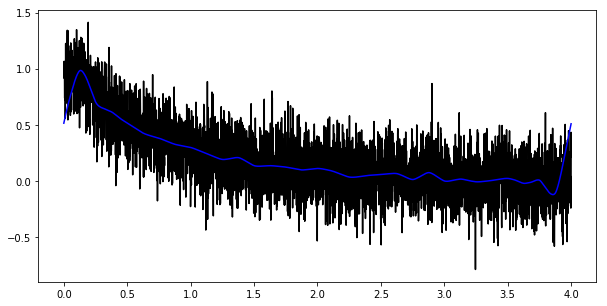

In [36]:
wp = pywt.WaveletPacket(data=Fexp, wavelet='coif3', mode='periodization') 
print([node.path for node in wp.get_level(7, 'freq')]) 

wp = pywt.WaveletPacket(data=Fexp, wavelet='coif3', mode='periodization') 
new_wp = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaaaaaa'] = wp['aaaaaaa'].data  # select the first node  
new_wp.reconstruct(update=True)  # update the data inside 
reF1 = new_wp.data    # reconstruct it 

plt.figure(figsize = (10, 5)) 
plt.plot(t, Fexp, 'k') 
plt.plot(t, reF1, 'b')  # component 1 
plt.show() 

24) Next, simulate in Python the time series with 4 different harmonic periods and decompose it into those 4 periodic components with wavelets: 

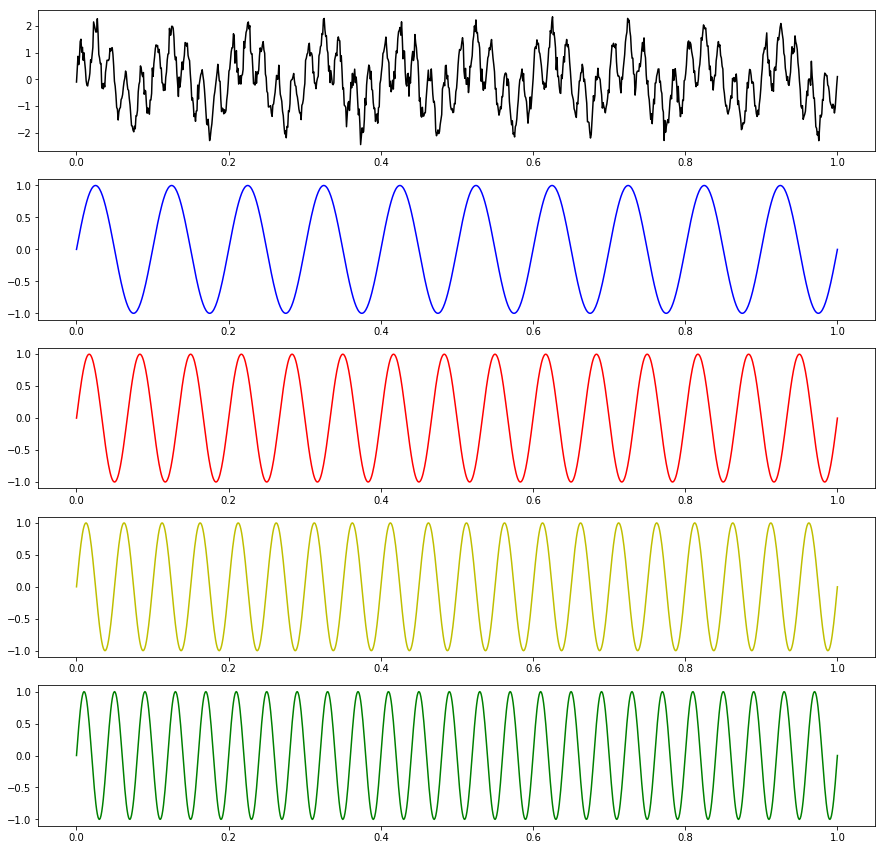

In [37]:
t = np.linspace(0, 1, 1024) 
f1 = 10
f2 = 15
f3 = 20
f4 = 25
ft=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+np.sin(2*np.pi*f3*t)+np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t)) 
plt.figure(figsize = (15,15)) 
plt.subplot(511)
plt.plot(t, F, 'k') # black line for data 
plt.subplot(512)
plt.plot(t, np.sin(2*np.pi*f1*t), 'b') # blue line for 1st periodic
plt.subplot(513)
plt.plot(t, np.sin(2*np.pi*f2*t), 'r') # red line for 2nd periodic 
plt.subplot(514)
plt.plot(t, np.sin(2*np.pi*f3*t), 'y')
plt.subplot(515)
plt.plot(t, np.sin(2*np.pi*f4*t), 'g')
plt.show()

In [38]:
wvlt = pywt.Wavelet('coif3') 
pywt.dwt_max_level(len(ft), wvlt) 

5

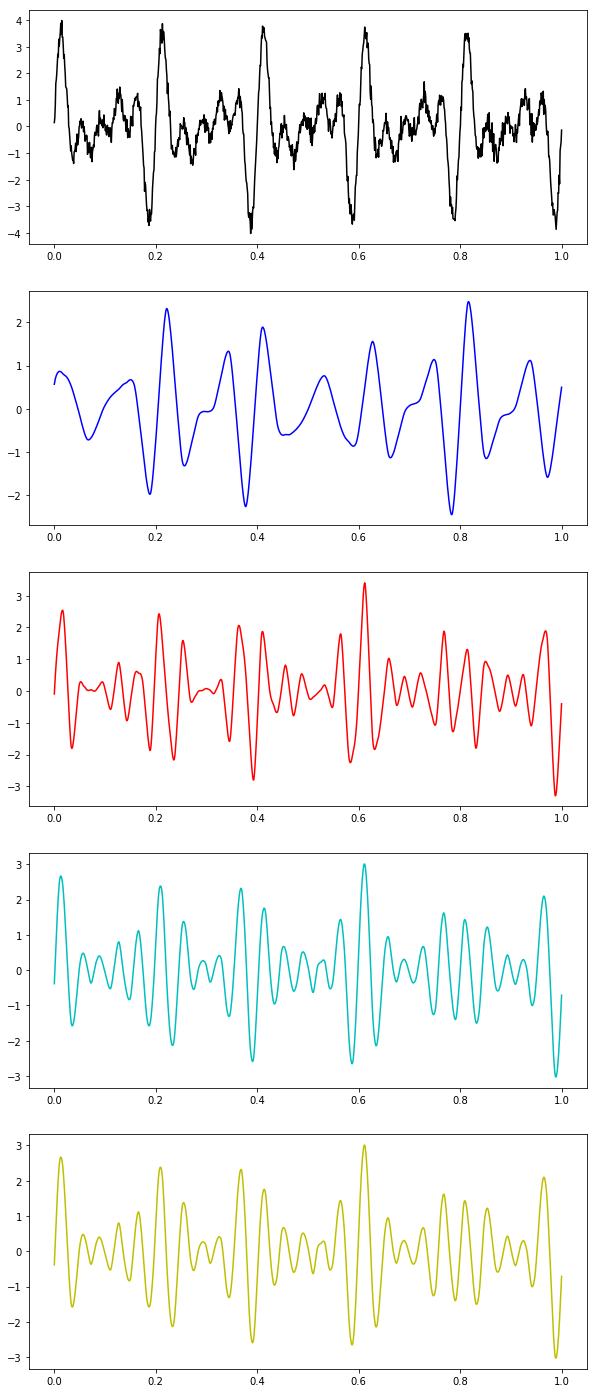

In [39]:
cA5,cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(ft, wvlt, mode='periodization', level=5) 
Fre = pywt.waverec((cA5,None, None, None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((None, cD5, None,None, None, None), wvlt, mode='periodization') 
Fre3 = pywt.waverec((None, cD5, cD4,None, None, None), wvlt, mode='periodization') 
Fre4 = pywt.waverec((None, cD5, cD4,None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 25)) 
plt.subplot(511)
plt.plot(t, ft, 'k') 
plt.subplot(512)
plt.plot(t, Fre, 'b') # this is the first period component 
plt.subplot(513)
plt.plot(t, Fre2, 'r') # this is the second period component 
plt.subplot(514)
plt.plot(t, Fre3, 'c') 
plt.subplot(515)
plt.plot(t, Fre4, 'y') 
plt.show() 

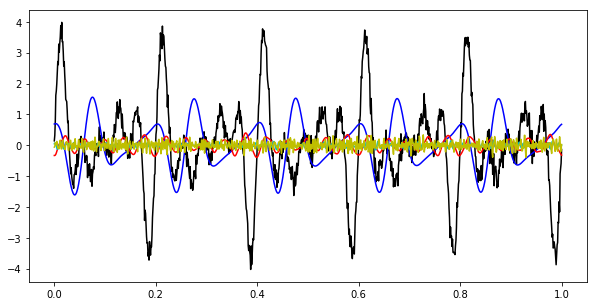

In [40]:
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(ft, wvlt, level=5) 
rr1 = pywt.iswt([(cA5, cD5)], wvlt) # inverse transform for one pair 
rr2 = pywt.iswt([(cD4, cD4)], wvlt) # inverse transform for one pair
rr3 = pywt.iswt([(cD3, cD3)], wvlt) # inverse transform for one pair 
rr4 = pywt.iswt([(cD2, cD2)], wvlt) # inverse transform for one pair 


plt.figure(figsize = (10, 5)) 
plt.plot(t, ft, 'k') 
plt.plot(t, rr1/5, 'b') # normalize by level 5 (one pair) 
plt.plot(t, rr2/4, 'r') # normalize be level 4 (one pair)
plt.plot(t, rr3/3, 'c')
plt.plot(t, rr4, 'y')
plt.show() 

['aaaaa', 'aaaad', 'aaadd', 'aaada', 'aadda', 'aaddd', 'aadad', 'aadaa', 'addaa', 'addad', 'adddd', 'addda', 'adada', 'adadd', 'adaad', 'adaaa', 'ddaaa', 'ddaad', 'ddadd', 'ddada', 'dddda', 'ddddd', 'dddad', 'dddaa', 'dadaa', 'dadad', 'daddd', 'dadda', 'daada', 'daadd', 'daaad', 'daaaa']


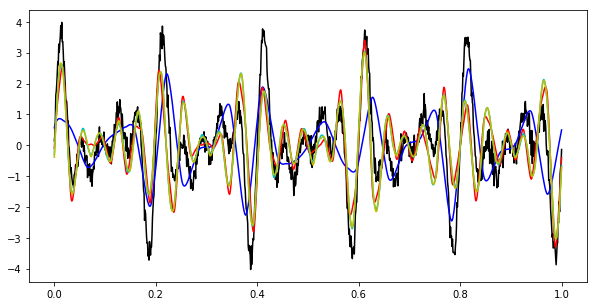

In [41]:
wp = pywt.WaveletPacket(data=ft, wavelet='coif3', mode='periodization') 
print([node.path for node in wp.get_level(5, 'freq')]) 

wp = pywt.WaveletPacket(data=ft, wavelet='coif3', mode='periodization') 
new_wp = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaaaa'] = wp['aaaaa'].data  # select the first node  
new_wp.reconstruct(update=True)  # update the data inside 
reF1 = new_wp.data    # reconstruct it 

new_wp = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaaad'] = wp['aaaad'].data  # select the second node  
new_wp.reconstruct(update=True)  # update the data inside 
reF2 = new_wp.data    # reconstruct another one 

new_wp1 = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaadd'] = wp['aaadd'].data  # select the second node  
new_wp.reconstruct(update=True)  # update the data inside 
reF3 = new_wp.data    # reconstruct another one 

new_wp2 = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaada'] = wp['aaada'].data  # select the second node  
new_wp.reconstruct(update=True)  # update the data inside 
reF4= new_wp.data    # reconstruct another one 

plt.figure(figsize = (10, 5)) 
plt.plot(t, ft, 'k') 
plt.plot(t, reF1, 'b')  # component 1 
plt.plot(t, reF2, 'r')   # component 2 
plt.plot(t, reF3, 'c')
plt.plot(t, reF4, 'y')
plt.show() 

25) At last, load the time series data from file doppler.mat:

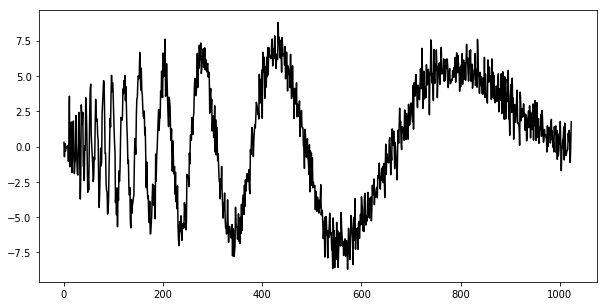

In [42]:
file = h5py.File('doppler.mat','r') 
data = file.get('data') 
data = np.array(data) 
plt.figure(figsize = (10, 5)) 
plt.plot(data, 'k')
plt.show() 

26) Decompose this data into some meaningful components with wavelet. Try to de-noise this data, i.e. clear the time series from noise completely with wavelets. Use only the basis wavelet for your student ID variant, everything else (level, grouping and so on) is adjustable.

In [61]:
wvlt = pywt.Wavelet('coif3') 
pywt.dwt_max_level(len(data), wvlt) 

5

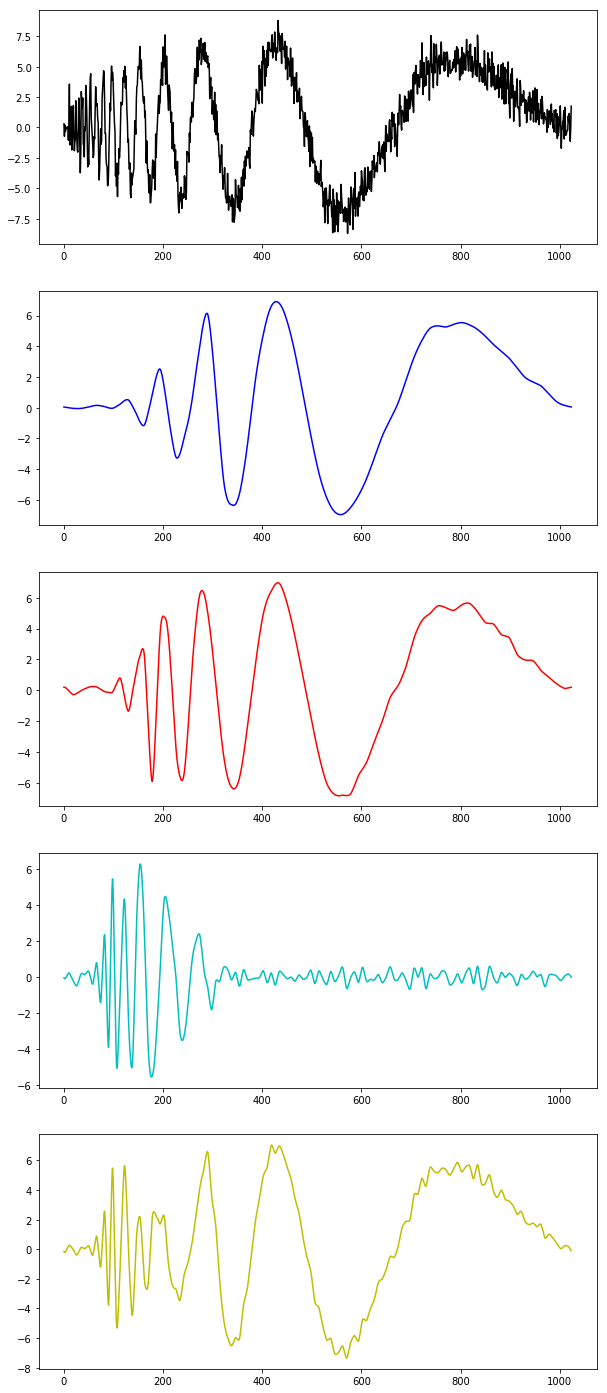

In [62]:
cA5,cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(data.T[0], wvlt, mode='periodization', level=5) 
Fre = pywt.waverec((cA5,None, None, None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((cA5, cD5, None,None, None, None), wvlt, mode='periodization') 
Fre3 = pywt.waverec((None, cD5, cD4,None, None, None), wvlt, mode='periodization') 
Fre4 = pywt.waverec((cA5, None, cD4,None, None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 25)) 
plt.subplot(511)
plt.plot(data, 'k') 
plt.subplot(512)
plt.plot(Fre, 'b') # this is the first period component 
plt.subplot(513)
plt.plot( Fre2, 'r') # this is the second period component 
plt.subplot(514)
plt.plot( Fre3, 'c') 
plt.subplot(515)
plt.plot( Fre4, 'y') 
plt.show() 

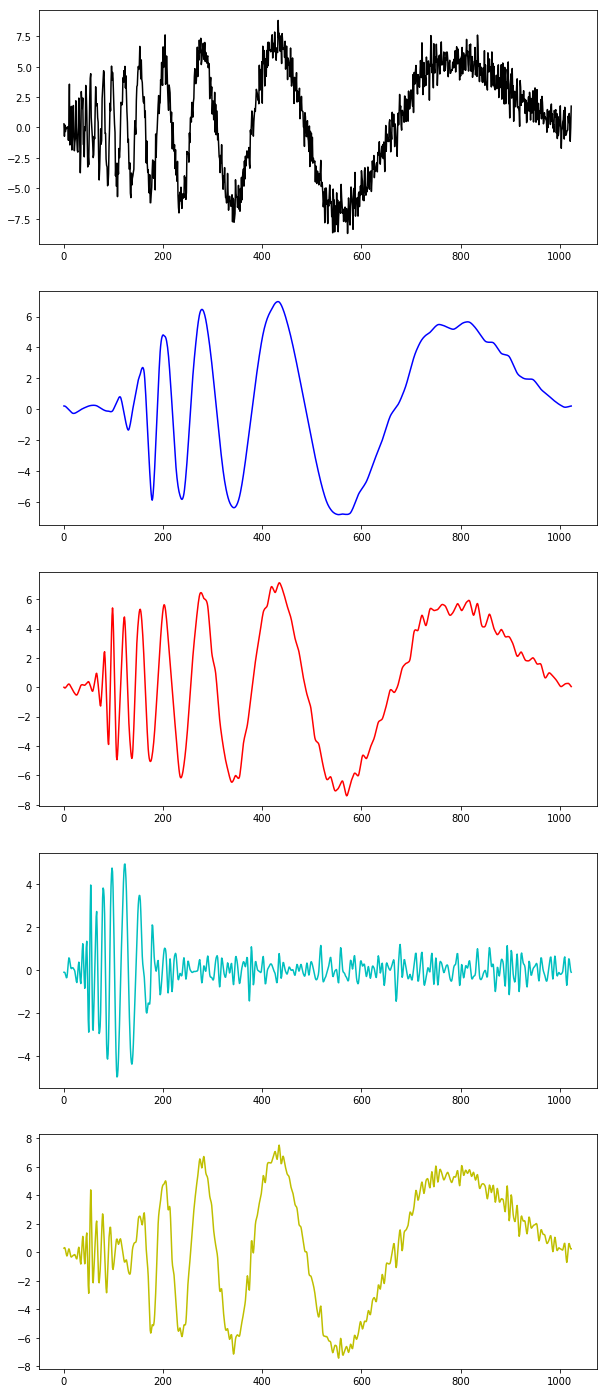

In [64]:
cA4,cD4, cD3, cD2, cD1 = pywt.wavedec(data.T[0], wvlt, mode='periodization', level=4) 
Fre = pywt.waverec((cA4,None, None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((cA4, cD4, None,None, None), wvlt, mode='periodization') 
Fre3 = pywt.waverec((None, cD4, cD3,None, None), wvlt, mode='periodization') 
Fre4 = pywt.waverec((cA4, None, cD3,None, None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 25)) 
plt.subplot(511)
plt.plot(data, 'k') 
plt.subplot(512)
plt.plot(Fre, 'b') # this is the first period component 
plt.subplot(513)
plt.plot( Fre2, 'r') # this is the second period component 
plt.subplot(514)
plt.plot( Fre3, 'c') 
plt.subplot(515)
plt.plot( Fre4, 'y') 
plt.show() 

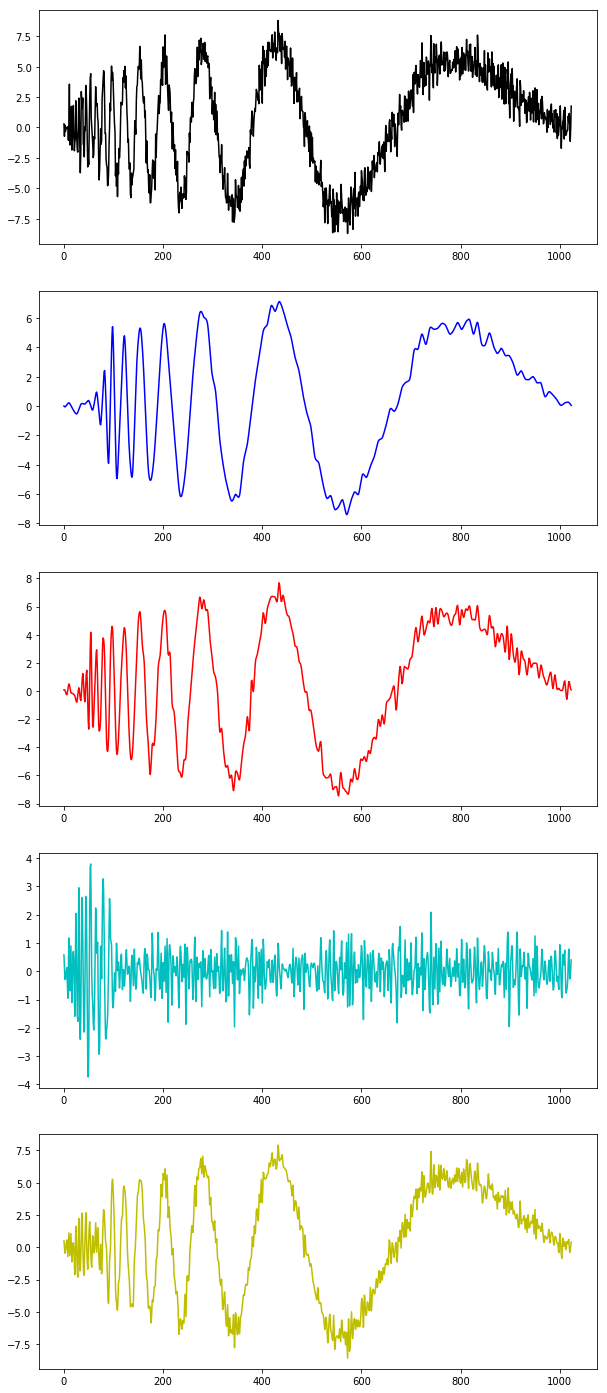

In [65]:
cA3, cD3, cD2, cD1 = pywt.wavedec(data.T[0], wvlt, mode='periodization', level=3) 
Fre = pywt.waverec((cA3,None, None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((cA3, cD3, None,None), wvlt, mode='periodization') 
Fre3 = pywt.waverec((None, cD3, cD2,None), wvlt, mode='periodization') 
Fre4 = pywt.waverec((cA3, None, cD2,None), wvlt, mode='periodization') 
plt.figure(figsize = (10, 25)) 
plt.subplot(511)
plt.plot(data, 'k') 
plt.subplot(512)
plt.plot(Fre, 'b') # this is the first period component 
plt.subplot(513)
plt.plot( Fre2, 'r') # this is the second period component 
plt.subplot(514)
plt.plot( Fre3, 'c') 
plt.subplot(515)
plt.plot( Fre4, 'y') 
plt.show() 

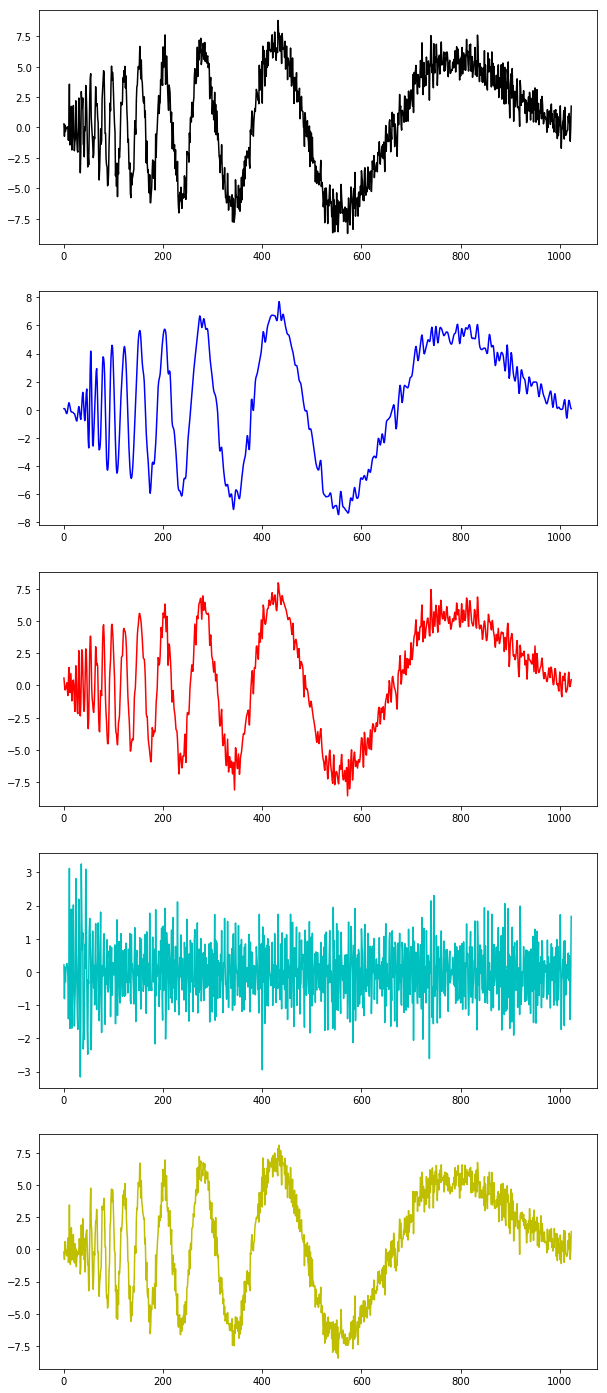

In [66]:
cA2, cD2, cD1 = pywt.wavedec(data.T[0], wvlt, mode='periodization', level=2) 
Fre = pywt.waverec((cA2,None, None), wvlt, mode='periodization') 
Fre2 = pywt.waverec((cA2, cD2, None), wvlt, mode='periodization') 
Fre3 = pywt.waverec((None, cD2, cD1), wvlt, mode='periodization') 
Fre4 = pywt.waverec((cA2, None, cD1), wvlt, mode='periodization') 
plt.figure(figsize = (10, 25)) 
plt.subplot(511)
plt.plot(data, 'k') 
plt.subplot(512)
plt.plot(Fre, 'b') # this is the first period component 
plt.subplot(513)
plt.plot( Fre2, 'r') # this is the second period component 
plt.subplot(514)
plt.plot( Fre3, 'c') 
plt.subplot(515)
plt.plot( Fre4, 'y') 
plt.show() 

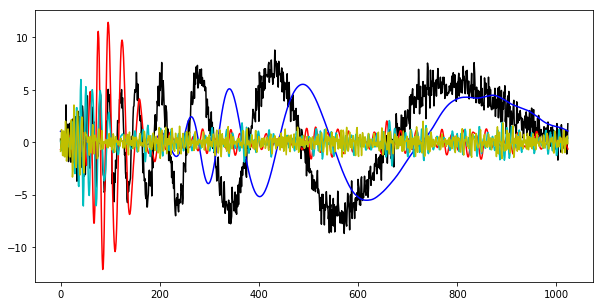

In [47]:
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(data.T[0], wvlt, level=5) 
rr1 = pywt.iswt([(cA5, cD5)], wvlt) # inverse transform for one pair 
rr2 = pywt.iswt([(cD4, cD4)], wvlt) # inverse transform for one pair
rr3 = pywt.iswt([(cD3, cD3)], wvlt) # inverse transform for one pair 
rr4 = pywt.iswt([(cD2, cD2)], wvlt) # inverse transform for one pair 


plt.figure(figsize = (10, 5)) 
plt.plot(data, 'k') 
plt.plot(rr1/5, 'b') # normalize by level 5 (one pair) 
plt.plot(rr2, 'r') # normalize be level 4 (one pair)
plt.plot(rr3, 'c')
plt.plot(rr4, 'y')
plt.show() 

['aaaaa', 'aaaad', 'aaadd', 'aaada', 'aadda', 'aaddd', 'aadad', 'aadaa', 'addaa', 'addad', 'adddd', 'addda', 'adada', 'adadd', 'adaad', 'adaaa', 'ddaaa', 'ddaad', 'ddadd', 'ddada', 'dddda', 'ddddd', 'dddad', 'dddaa', 'dadaa', 'dadad', 'daddd', 'dadda', 'daada', 'daadd', 'daaad', 'daaaa']


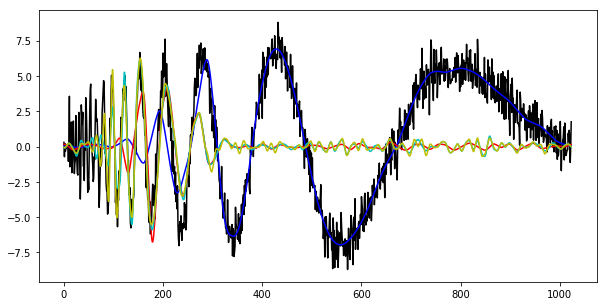

In [51]:
wp = pywt.WaveletPacket(data=data.T[0], wavelet='coif3', mode='periodization') 
print([node.path for node in wp.get_level(5, 'freq')]) 

wp = pywt.WaveletPacket(data=data.T[0], wavelet='coif3', mode='periodization') 
new_wp = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaaaa'] = wp['aaaaa'].data  # select the first node  
new_wp.reconstruct(update=True)  # update the data inside 
reF1 = new_wp.data    # reconstruct it 

new_wp = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaaad'] = wp['aaaad'].data  # select the second node  
new_wp.reconstruct(update=True)  # update the data inside 
reF2 = new_wp.data    # reconstruct another one 

new_wp1 = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaadd'] = wp['aaadd'].data  # select the second node  
new_wp.reconstruct(update=True)  # update the data inside 
reF3 = new_wp.data    # reconstruct another one 

new_wp2 = pywt.WaveletPacket(data=None, wavelet='coif3', mode='periodization') 
new_wp['aaada'] = wp['aaada'].data  # select the second node  
new_wp.reconstruct(update=True)  # update the data inside 
reF4= new_wp.data    # reconstruct another one 

plt.figure(figsize = (10, 5)) 
plt.plot(data, 'k') 
plt.plot(reF1, 'b')  # component 1 
plt.plot(reF2, 'r')   # component 2 
plt.plot(reF3, 'c')
plt.plot(reF4, 'y')
plt.show() 